In [523]:
import pandas as pd

In [524]:
credit = pd.read_csv('credit_data.csv')
user = pd.read_csv('users_data.csv')
txn = pd.read_csv('transactions_data.csv')
stlmt = pd.read_csv('settlements_data.csv')
cycles = pd.read_csv('cycles.csv')
fail = pd.read_csv('failure_events_data.csv')

In [525]:
user.columns
user.head(5)

,user_id,referrer,email,name,city_id
0,1,a,1@1.com,oh t,4.0
1,2,a,2@2.com,nk s,7.0
2,3,NaN,3@1.com,itna,NaN
3,4,a,4@3.com,osn,3.0
4,5,a,5@1.com,um s,7.0


In [526]:
#clean the user data, make referrer boolean, drop city NaN
user['referrer'].nunique()
user['referrer'].loc[~user['referrer'].isna()] = 1
user['referrer'].loc[user['referrer'].isna()] = 0
#user.dropna(subset=['city_id']);

In [527]:
#check for grouping in user, city
user.describe()
user.head(5)

,user_id,referrer,email,name,city_id
0,1,1,1@1.com,oh t,4.0
1,2,1,2@2.com,nk s,7.0
2,3,0,3@1.com,itna,NaN
3,4,1,4@3.com,osn,3.0
4,5,1,5@1.com,um s,7.0


In [528]:
#check for multi cities, group the user
user.groupby(['user_id', 'city_id']).filter(lambda x: len(x) > 1)

,user_id,referrer,email,name,city_id


In [529]:
credit.info()
credit.describe()
#credit is all clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18468 entries, 0 to 18467
Data columns (total 3 columns):
user_id                18468 non-null int64
cycle_id               18468 non-null int64
global_credit_limit    18468 non-null int64
dtypes: int64(3)
memory usage: 432.9 KB


,user_id,cycle_id,global_credit_limit
count,18468.000000,18468.000000,18468.000000
mean,8067.809129,14.217295,126512.887156
std,4362.935645,4.649221,65312.491560
min,1.000000,2.000000,50000.000000
25%,4284.750000,10.000000,75000.000000
50%,8436.500000,15.000000,150000.000000
75%,11720.250000,18.000000,150000.000000
max,16045.000000,22.000000,1000000.000000


In [530]:
cycles.head(5) #cycles is all clean

,cycle_id,start_date,end_date
0,1,2015-11-01 00:00:00 +0000 +0000,2015-11-15 00:00:00 +0000 +0000
1,2,2015-11-16 00:00:00 +0000 +0000,2015-11-30 23:59:59 +0000 +0000
2,3,2015-12-01 00:00:00 +0000 +0000,2015-12-15 00:00:00 +0000 +0000
3,4,2015-12-16 00:00:00 +0000 +0000,2015-12-31 23:59:59 +0000 +0000
4,5,2016-01-01 00:00:00 +0000 +0000,2016-01-15 23:59:59 +0000 +0000


In [531]:
len(cycles)

23

In [532]:
#check settlements data
stlmt.info()
stlmt.describe(include='all')
#stlmt.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30683 entries, 0 to 30682
Data columns (total 8 columns):
id                   30683 non-null int64
user_id              30683 non-null int64
cycle_id             30681 non-null float64
settlement_amount    30683 non-null int64
settlement_status    30683 non-null object
days_delayed         22395 non-null float64
bill_created_at      24980 non-null object
settled_at           28098 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


,id,user_id,cycle_id,settlement_amount,settlement_status,days_delayed,bill_created_at,settled_at
count,30683.000000,30683.000000,30681.000000,30683.000000,30683,22395.000000,24980,28098
unique,NaN,NaN,NaN,NaN,3,NaN,24980,28098
top,NaN,NaN,NaN,NaN,bill_settled,NaN,2016-07-31 16:03:35.213719 +0000 +0000,2016-08-08 17:23:54.236441 +0000 +0000
freq,NaN,NaN,NaN,NaN,22395,NaN,1,1
mean,15378.590620,6210.827527,15.237737,50890.082065,NaN,5.098359,NaN,NaN
std,8907.130545,3667.269698,3.560640,40286.805289,NaN,9.669068,NaN,NaN
min,1.000000,1.000000,5.000000,37.000000,NaN,0.000674,NaN,NaN
25%,7676.500000,3282.000000,13.000000,23300.000000,NaN,0.587529,NaN,NaN
50%,15351.000000,5927.000000,16.000000,37600.000000,NaN,1.185550,NaN,NaN
75%,23030.500000,8962.000000,18.000000,65464.000000,NaN,5.789314,NaN,NaN


In [533]:
stlmt['settlement_status'].unique()

array(['onetime_settlement', 'bill_settled', 'bill_pending'], dtype=object)

In [534]:
#encode the settlement_status
stlmt['settlement_status'] = stlmt.settlement_status.astype('category').cat.codes
#bill_pending = 0, bill_settled = 1, onetime = 2

In [535]:
#cycle id missing?
stlmt['cycle_id'].loc[stlmt['cycle_id'].isnull() == True]

28043   NaN
28060   NaN
Name: cycle_id, dtype: float64

In [607]:
#drop cycle_id NaN
stlmt.dropna(subset=['cycle_id']);
#remove days_delayed NaN
stlmt['days_delayed'].loc[stlmt['days_delayed'].isna()] = 0
stlmt.head(5)

AttributeError: 'int' object has no attribute 'dropna'

###### modify the tables with timestamp fields to respective cycle, based on time range

In [547]:
#write a function that takes the data frane as input, the column name and appends the cycle_id
def getCycleId(df, colname):
    #change the colname type tp datetime
    df[colname] = pd.to_datetime(df[colname])
    #create a new col, cycle_id
    df['cycle_id'] = 0
    
    #now check for each cycle range and assign cycle_id
    for index, row in cycles.iterrows():
        st = row['start_date']
        end = row['end_date']
        cid = row['cycle_id']
        df['cycle_id'].loc[(df[colname] >= st) & (df[colname]<= end)] = cid   

In [548]:
getCycleId(txn,'created_at')
getCycleId(fail,'created_at')

In [549]:
fail.head(5)

,failure_event_id,transaction_id,user_id,failure_type,amount_in_paise,created_at,cycle_id
0,1,56,5,error1,7000,2015-12-18 06:55:41.849240,4
1,2,63,183,error1,13000,2016-01-06 12:11:19.504704,5
2,3,64,183,error1,13000,2016-01-06 12:13:28.760053,5
3,4,65,183,error1,13000,2016-01-06 12:35:36.668034,5
4,5,66,183,error1,13000,2016-01-06 12:42:44.678453,5


In [550]:
#change amount to Rs.
fail['transaction_amount'] = fail['amount_in_paise']/100

In [551]:
sample = fail.head(100)
sample;

### Let's visualize and look for patterns

##### There could be two main aspects to no repayment - 
1. Customers nature/ habit (Inherent)
2. Dissatisfaction (Induced)<br>
<b>Note:</b> Interesting would to be figure out when somebody forgets (nature not recurrent - False Positives)

In [592]:
#start with failure events data, something for induced behaviour
#Join failure and settlement data, drop irrelevant columns
stlmt.head(5)
stlmt_new = stlmt[['user_id', 'cycle_id', 'settlement_amount','settlement_status','days_delayed']]
stlmt_new.head(5)
stlmt_new.describe()

,user_id,cycle_id,settlement_amount,settlement_status,days_delayed
count,30683.000000,30681.000000,30683.000000,30683.000000,30683.000000
mean,6210.827527,15.237737,50890.082065,1.101620,3.721205
std,3667.269698,3.560640,40286.805289,0.509705,8.565128
min,1.000000,5.000000,37.000000,0.000000,0.000000
25%,3282.000000,13.000000,23300.000000,1.000000,0.000000
50%,5927.000000,16.000000,37600.000000,1.000000,0.754106
75%,8962.000000,18.000000,65464.000000,1.000000,2.867036
max,16033.000000,21.000000,746000.000000,2.000000,210.576996


In [555]:
fail.head(5)

,failure_event_id,transaction_id,user_id,failure_type,amount_in_paise,created_at,cycle_id,transaction_amount
0,1,56,5,error1,7000,2015-12-18 06:55:41.849240,4,70.0
1,2,63,183,error1,13000,2016-01-06 12:11:19.504704,5,130.0
2,3,64,183,error1,13000,2016-01-06 12:13:28.760053,5,130.0
3,4,65,183,error1,13000,2016-01-06 12:35:36.668034,5,130.0
4,5,66,183,error1,13000,2016-01-06 12:42:44.678453,5,130.0


In [556]:
fail_new = fail[['user_id','cycle_id', 'transaction_id', 'transaction_amount','failure_type']]
fail_new.head(5)
fail_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17993 entries, 0 to 17992
Data columns (total 5 columns):
user_id               17993 non-null int64
cycle_id              17993 non-null int64
transaction_id        17993 non-null int64
transaction_amount    17993 non-null float64
failure_type          17993 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 702.9+ KB


In [557]:
fail_new.groupby('transaction_id').filter(lambda x: len(x)>1)

,user_id,cycle_id,transaction_id,transaction_amount,failure_type
40,197,7,302,2969.0,error4
41,197,7,302,2969.0,error4
46,197,7,302,2969.0,error4
47,179,7,336,1114.0,error4
49,197,7,302,2969.0,error4
50,179,7,336,1114.0,error5
131,179,8,336,1114.0,error5
190,179,8,336,1114.0,error5
191,197,8,302,2969.0,error5
500,4208,9,5338,2090.0,error4


In [558]:
#need to remove the duplicated/ erroneus entries
fail_new  = fail_new.groupby('transaction_id').filter(lambda x: len(x)<=1)

In [559]:
fail_new.info()
fail_new.transaction_id.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17969 entries, 0 to 17992
Data columns (total 5 columns):
user_id               17969 non-null int64
cycle_id              17969 non-null int64
transaction_id        17969 non-null int64
transaction_amount    17969 non-null float64
failure_type          17969 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 842.3+ KB


17969

In [560]:
fail_new['failure_type'].unique()

array(['error1', 'error2', 'error3', 'error6'], dtype=object)

In [561]:
#join the two on user_id, cycle_id (interesting to check if there is some intersection or not)
stlmt_fail = pd.merge(stlmt_new,fail_new, how='inner', left_on=['user_id','cycle_id'], right_on = ['user_id','cycle_id'])

In [562]:
stlmt_fail.head(5)

,user_id,cycle_id,settlement_amount,settlement_status,days_delayed,transaction_id,transaction_amount,failure_type
0,1738,21,190500,2,0.000000,114292,324.0,error2
1,1738,21,190500,2,0.000000,117868,289.0,error2
2,1738,21,190500,2,0.000000,125780,306.0,error3
3,6055,20,138900,1,14.966468,111291,180.0,error3
4,12416,20,38000,1,14.971875,109135,696.0,error3


In [563]:
stlmt_fail = stlmt_fail.dropna(how='any')
stlmt_fail.head(6)

,user_id,cycle_id,settlement_amount,settlement_status,days_delayed,transaction_id,transaction_amount,failure_type
0,1738,21,190500,2,0.000000,114292,324.0,error2
1,1738,21,190500,2,0.000000,117868,289.0,error2
2,1738,21,190500,2,0.000000,125780,306.0,error3
3,6055,20,138900,1,14.966468,111291,180.0,error3
4,12416,20,38000,1,14.971875,109135,696.0,error3
5,12228,20,17700,1,14.986789,100748,177.0,error2


In [564]:
stlmt_fail_count = stlmt_fail.groupby(['user_id', 'cycle_id'], as_index=False)['transaction_id'].count()

In [565]:
stlmt_fail_count = stlmt_fail_count.rename(index=str,columns = {'transaction_id':'num_failed_txns'});
stlmt_fail_count.head(5)

,user_id,cycle_id,num_failed_txns
0,1,14.0,1
1,2,11.0,1
2,2,12.0,3
3,2,15.0,2
4,2,17.0,2


In [566]:
stlmt_fail_count = pd.merge(stlmt_fail_count,stlmt_fail, how='inner', left_on=['user_id','cycle_id'], right_on = ['user_id','cycle_id'])

In [567]:
stlmt_fail_count.columns

Index([u'user_id', u'cycle_id', u'num_failed_txns', u'settlement_amount',
       u'settlement_status', u'days_delayed', u'transaction_id',
       u'transaction_amount', u'failure_type'],
      dtype='object')

In [568]:
stlmt_fail_count = stlmt_fail_count[['user_id', 'cycle_id','num_failed_txns','settlement_amount','settlement_status','days_delayed']]

In [569]:
stlmt_fail_count.drop_duplicates(keep='first');
stlmt_fail_count.head(5)

,user_id,cycle_id,num_failed_txns,settlement_amount,settlement_status,days_delayed
0,1,14,1,67200,1,0.023479
1,2,11,1,11700,1,6.647299
2,2,12,3,74300,1,8.467596
3,2,12,3,74300,1,8.467596
4,2,12,3,74300,1,8.467596


In [570]:
stlmt_fail_count['cycle_id'] = stlmt_fail_count['cycle_id'].astype('int')

In [571]:
stlmt_fail_count.dtypes

user_id                int64
cycle_id               int64
num_failed_txns        int64
settlement_amount      int64
settlement_status       int8
days_delayed         float64
dtype: object

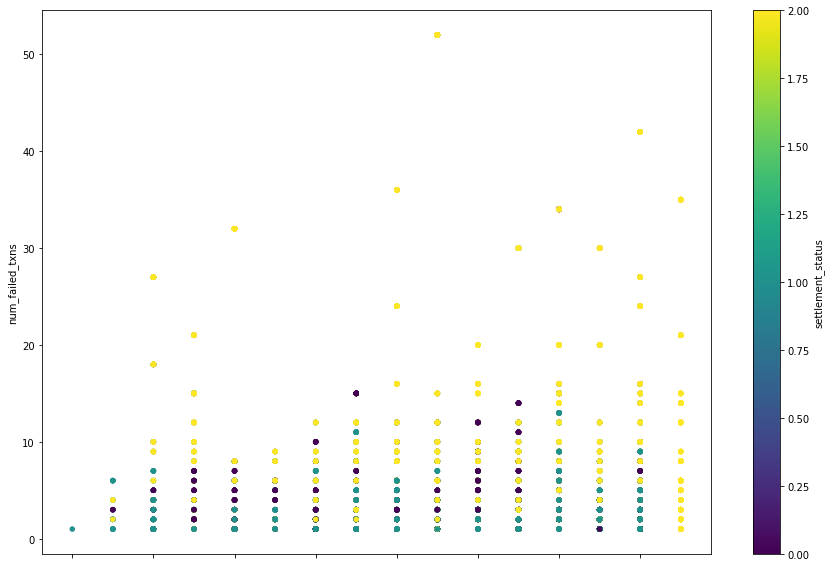

In [572]:
ax2 = stlmt_fail_count.plot.scatter(x='cycle_id',
                                    y='num_failed_txns',
                                    c='settlement_status',
                                    colormap='viridis', figsize = (15, 10))

###### not conclusive, need to change the visualization for better

##### Let's work with transactions data
split first into latest and old(repayed transactions)

In [573]:
txn.head(5)

,transaction_id,user_id,merchant_id,transaction_amount,created_at,cycle_id
0,141695,13693,1,10100,2016-09-30 15:29:10.228672,22
1,141694,8166,1,20900,2016-09-30 15:29:00.286923,22
2,141688,15886,1,28100,2016-09-30 15:27:55.801021,22
3,141686,12014,8,18000,2016-09-30 15:27:17.891471,22
4,141684,12392,1,63500,2016-09-30 15:25:56.857979,22


In [574]:
txn_22 = txn[txn['cycle_id']==22]

In [575]:
txn_22.size

51996

In [576]:
txn.size

442386

In [577]:
txn_old = txn[txn['cycle_id']!=22]
txn_old = txn_old.drop(columns=['created_at']);
txn_old.head(5)

,transaction_id,user_id,merchant_id,transaction_amount,cycle_id
8666,125783,14496,1,13200,21
8667,125782,4054,1,19300,21
8668,125779,14501,1,19200,21
8669,125776,189,1,19800,21
8670,125775,6212,1,20400,21


In [578]:
txn_old.size
txn_old.merchant_id.unique()

array([ 1, 18, 10, 13,  7, 11,  6,  8, 14,  9, 15,  2,  3, 17, 16, 12,  4,
        5])

In [579]:
#tables of interest left -> user, txns, credit, settlements
user.columns

Index([u'user_id', u'referrer', u'email', u'name', u'city_id'], dtype='object')

In [580]:
user_rel = user.drop(columns=['email','name']);
user_rel.head(5)

,user_id,referrer,city_id
0,1,1,4.0
1,2,1,7.0
2,3,0,NaN
3,4,1,3.0
4,5,1,7.0


In [581]:
credit.head(5)

,user_id,cycle_id,global_credit_limit
0,2358,15,75000
1,2358,18,150000
2,10504,21,150000
3,10504,16,75000
4,9948,14,75000


In [602]:
#first look at txn and stlmt, how does num of txn, avgtxnamnt relate with settlement
print stlmt_new.head(5), txn_old.head(5)
print stlmt_new.size, txn_old.size

   user_id  cycle_id  settlement_amount  settlement_status  days_delayed
0     1738      21.0             190500                  2      0.000000
1     6055      20.0             138900                  1     14.966468
2    10630      20.0              43100                  1     14.985449
3     5766      21.0              75300                  2      0.000000
4    12416      20.0              38000                  1     14.971875       transaction_id  user_id  merchant_id  transaction_amount  cycle_id
8666          125783    14496            1               13200        21
8667          125782     4054            1               19300        21
8668          125779    14501            1               19200        21
8669          125776      189            1               19800        21
8670          125775     6212            1               20400        21
153415 325325


In [583]:
stlmt_txn = pd.merge(stlmt_new,txn_old, how='inner', left_on=['user_id','cycle_id'], right_on = ['user_id','cycle_id'])

In [584]:
stlmt_txn = stlmt_txn.dropna(how='any');
stlmt_txn.head(10)

,user_id,cycle_id,settlement_amount,settlement_status,days_delayed,transaction_id,merchant_id,transaction_amount
0,1738,21,190500,2,0.000000,124862,1,29000
1,1738,21,190500,2,0.000000,124182,1,30200
2,1738,21,190500,2,0.000000,121522,1,20000
3,1738,21,190500,2,0.000000,121025,1,25500
4,1738,21,190500,2,0.000000,120350,1,28000
5,1738,21,190500,2,0.000000,119628,1,28900
6,1738,21,190500,2,0.000000,117871,1,28900
7,6055,20,138900,1,14.966468,111297,1,12500
8,6055,20,138900,1,14.966468,110484,1,18000
9,6055,20,138900,1,14.966468,109425,1,18000


In [585]:
f = {'transaction_id':['count'], 'merchant_id':['count']}
stlmt_txn_new = stlmt_txn.groupby(['user_id','cycle_id','settlement_amount','settlement_status','days_delayed'],as_index=False).agg(f)

In [586]:
stlmt_txn_new.head(10)

,user_id,cycle_id,settlement_amount,settlement_status,days_delayed,merchant_id,transaction_id
,,,,,,count,count
0,1,14.0,67200,1,0.023479,3,3
1,1,15.0,32500,1,0.044287,1,1
2,1,18.0,108600,1,0.010955,2,2
3,2,5.0,13000,1,10.377654,1,1
4,2,7.0,36500,1,0.235332,3,3
5,2,8.0,42200,1,0.779108,2,2
6,2,9.0,21200,1,0.742215,1,1
7,2,10.0,32900,1,5.651593,1,1
8,2,11.0,11700,1,6.647299,1,1


In [587]:
user_rel.head(5) #we need to add user and credit data to the above dataframe, 
                 #then we will cross to get cycle = cycle+1

,user_id,referrer,city_id
0,1,1,4.0
1,2,1,7.0
2,3,0,NaN
3,4,1,3.0
4,5,1,7.0


In [588]:
credit.head(5)

,user_id,cycle_id,global_credit_limit
0,2358,15,75000
1,2358,18,150000
2,10504,21,150000
3,10504,16,75000
4,9948,14,75000


In [589]:
stlmt_txn_new1 = pd.merge(stlmt_txn_new,credit, how='inner', left_on=['user_id','cycle_id'], right_on = ['user_id','cycle_id'])

In [590]:
stlmt_txn_new1.tail(5)

,user_id,cycle_id,"(user_id, )","(cycle_id, )","(settlement_amount, )","(settlement_status, )","(days_delayed, )","(merchant_id, count)","(transaction_id, count)",global_credit_limit
4926,15313,17.0,15313,17,83500,1,4.006418,2,2,150000
4927,15319,15.0,15319,15,65600,2,0.000000,5,5,150000
4928,15319,15.0,15319,15,135700,2,0.000000,5,5,150000
4929,15319,16.0,15319,16,49900,1,2.100890,2,2,200000
4930,15319,16.0,15319,16,54300,2,0.000000,2,2,200000


In [591]:
stlmt_txn_new1.columns

Index([                   u'user_id',                   u'cycle_id',
                   (u'user_id', u''),            (u'cycle_id', u''),
         (u'settlement_amount', u''),   (u'settlement_status', u''),
              (u'days_delayed', u''),    (u'merchant_id', u'count'),
       (u'transaction_id', u'count'),        u'global_credit_limit'],
      dtype='object')